#### SWA-Gaussian (SWAG)

- They use the information contained in the SGD trajectory to efficiently approximate the posterior distribution over the weights.
- With SWAG, uncertainty in weight space is captured with minimal modifications to the SWA training procedure.

- SWA-Gaussian (SWAG) is a simple, scalable and convenient approach to uncertainty estimation and calibration in Bayesian deep learning.
- Similarly to SWA, which maintains a running average of SGD iterates, **SWAG estimates the first and second moments of the iterates to construct a Gaussian distribution over weights.** SWAG distribution approximates the shape of the true posterior.

- Empirically, SWAG performs on par or better than popular alternatives including MC dropout, KFAC Laplace, and temperature scaling on uncertainty quantification.

#### SWAG-Diagonal

<img src = attachment:image.png width=500><br><center>*source: https://bayesgroup.github.io/</center>
- The resulting approximate posterior distribution is then $N(\theta_{\text{SWA}}, \Sigma_{\text{Diag}})$
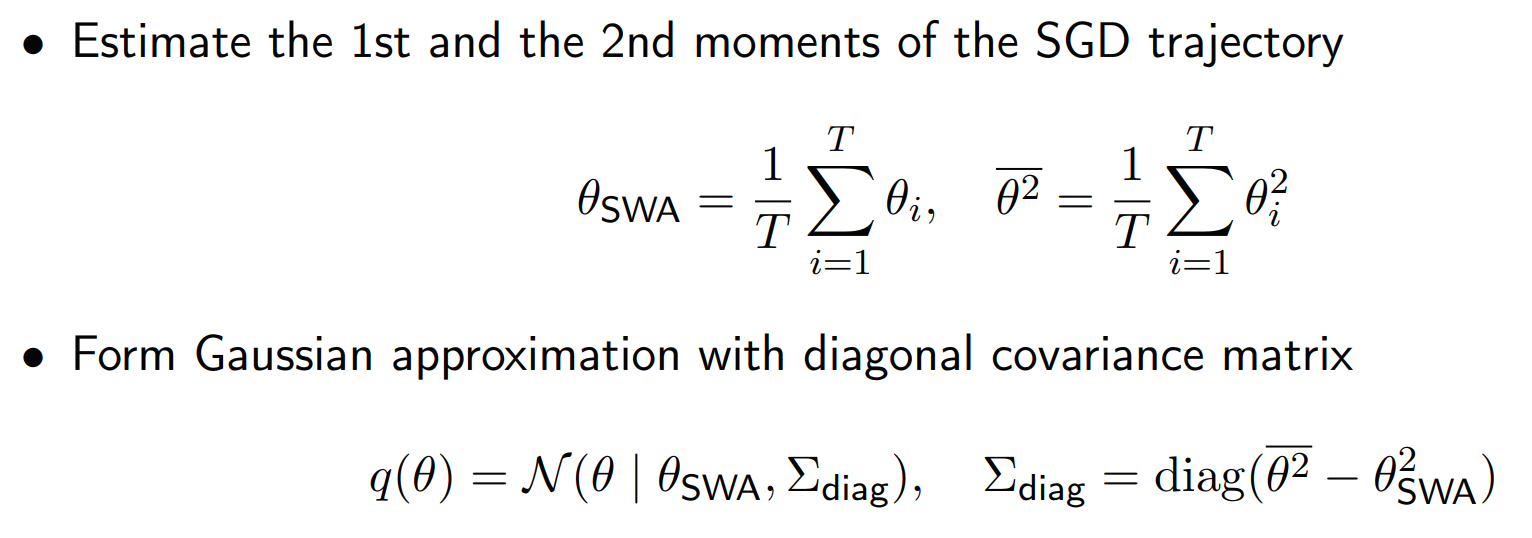

<img src=attachment:image.png width=450>
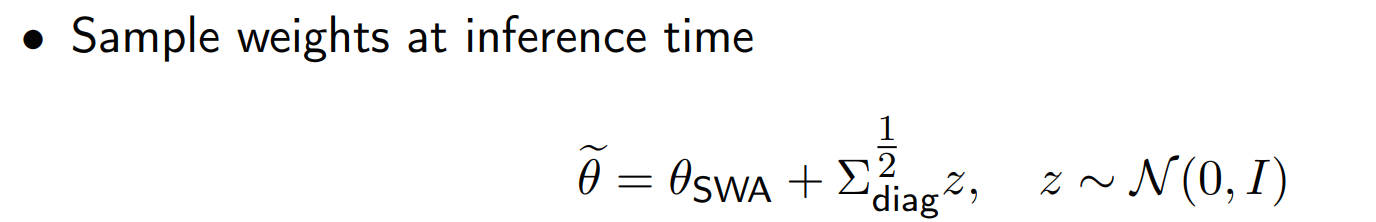

#### SWAG-Low Rank plus Diagonal

- While the diagonal covariance approximation is standard in Bayesian deep learning, it can be too restrictive. We extend the idea of SWAG-Diagonal to use a more flexible low-rank plus diagonal form of the approximate covariance.

- Estimation of covariance matrices
    - If we have T samples of $\theta$ (where $\theta=[\theta_1, \theta_2, \ldots ,\theta_p$]), we can estimate the covariance matrix as sum of products, $\Sigma = \frac{1}{T-1} \sum_{i=1}^{T} (\theta_i-\theta_{\text{SWA}})(\theta_i-\theta_{\text{SWA}})^T $
    - When p > T, this is T rank unbiased estimator of the $p \times p$ covariance matrix. ($(p\times 1) \cdot (1\times p) = (p\times p)$)
    - But, if we take 100 samples of $\theta$, rank T can be computationally expensive, thus they use only the last K ones. (e.g. K=30)
    - "In practice to limit the rank of the estimated covariance matrix we only use the last K of $D_i$ vectors corresponding to the last K epochs of training. Here K is the rank of the resulting approximation and is a hyperparameter of the method. We define $\hat{D}$ to be the matrix with columns equal to $D_i$ for $i = T −K +1, \ldots ,T$."

<img src=attachment:image.png width=550>
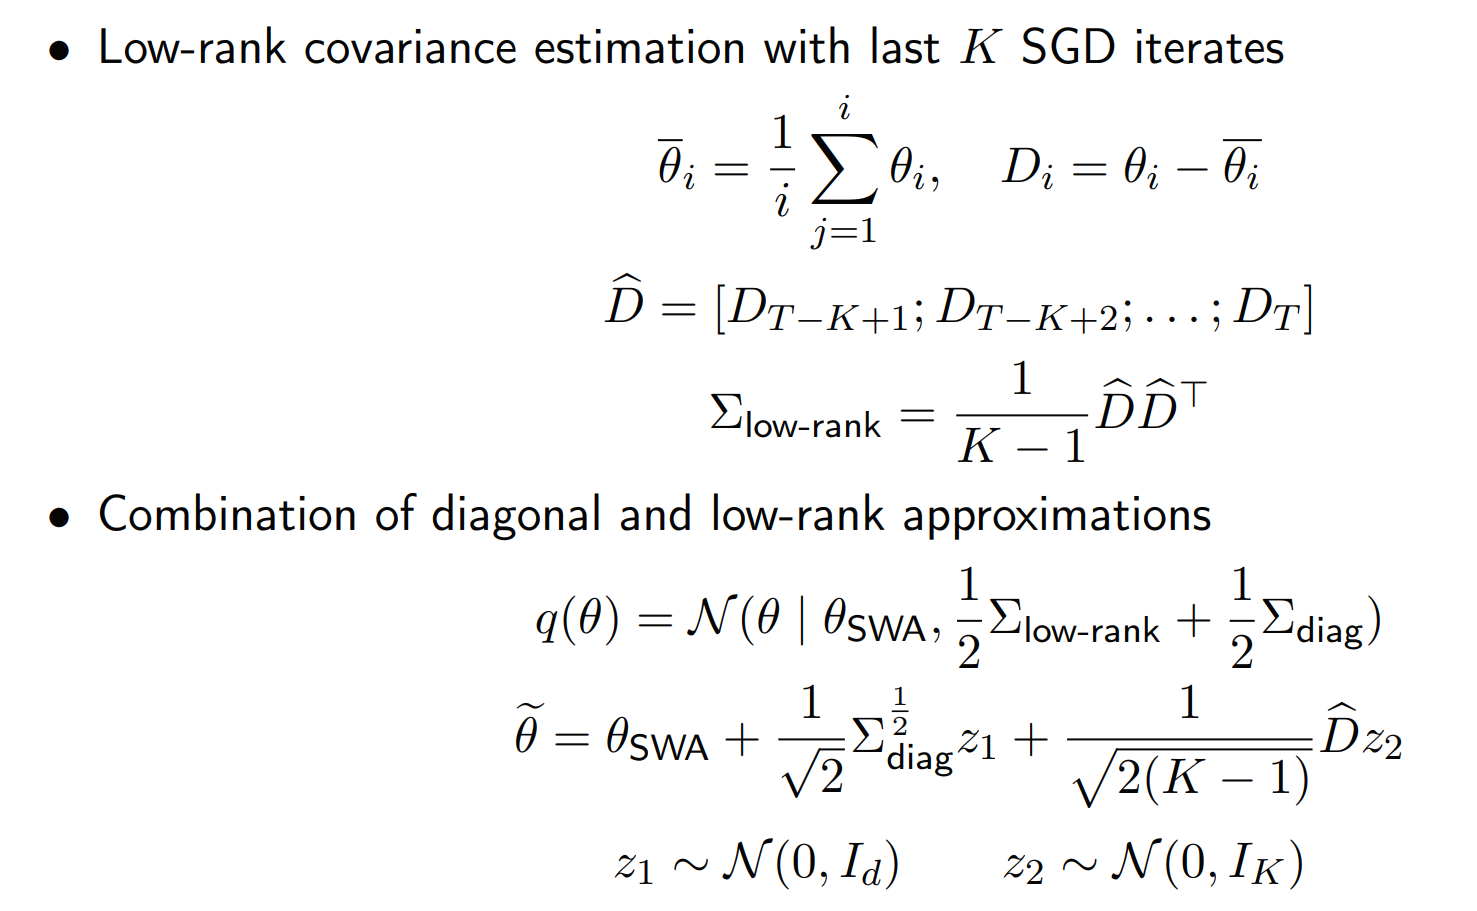

- The authors combine the diagonal approximation and low-rank approximation. (divide by 2)
- I guess low-rank approximation alone doesn't work well. 